# Lab Course Machine Learning
## Exercise Sheet 3
### Prof. Dr. Dr. Lars Schmidt-Thieme, Hadi Samer Jomaa
Information Systems and Machine Learning Lab
University of Hildesheim
November 13th, 2017
Submission on November 20th, 2017 at 8:00 am, (on moodle, course code 3113)

## Exercise 1: Data preprocessing (5 Points)
You are required to pre-process given datasets.
1.  Convert any non-numeric values to numeric values.  For example you can replace a country name with an integer value or more appropriately use hot-one encoding.   [Hint:  use hashmap (dict) or pandas.get_dummies]. Please explain your solution.
2.  If required drop out the rows with missing values or NA. In next lectures we will handle sparse data, which will allow us to use records with missing values.
3.  Split the data into a train(80%) and test(20%)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RWn = pd.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=";")
WWn = pd.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=";")
msk = np.random.rand(len(RWn)) < 0.8  #Random assign
tr = RWn[msk]
tst = RWn[~msk]



   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 


In [11]:
RWn.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##### For this excercise all the values are numerical, usage of dummies not required

##### Modeling variables choosen (x's):
1. Free sulfur dioxide
2. Total sulfur dioxide
3. Residual Sugar
4. Fixed Acidity
5. Alcohol


##### Dependent variable (y):

1. Wine Quality


In [16]:
Xtr = np.array([tr["free sulfur dioxide"], tr["total sulfur dioxide"], tr["residual sugar"], tr["fixed acidity"], tr.alcohol]).T
Xtst = np.array([tst["free sulfur dioxide"], tst["total sulfur dioxide"], tst["residual sugar"], tst["fixed acidity"], tst.alcohol]).T
Ytr = np.array([tr.quality]).T
Ytst  = np.array([tst.quality]).T
A = np.vstack([Xtr.T, np.ones(len(Xtr))]).T


### Exercise 2: Linear Regression with Gradient Descent (15 Points)
#### Part A: (8 Points): Implement Linear Regression with Gradient Descent
In this part you are required
to implement linear regression algorithm with gradient descent algorithm.  Reference lecture
https://
www.ismll.uni-hildesheim.de/lehre/ml-16w/script/ml-02-A1-linear-regression.
pdf
For each dataset given above
1.  A set of training data Dtrain={(x(1),y(1)),(x(2),y(2)),...,(x(N),y(N))}, wherex∈RM,y∈R,Nis number of training examples andMis number of features
2.  Linear Regression model is given as ŷn= ∑βmxm
3.  Least square loss function is given as l(x,y) = ∑(y − ŷ)² 
4.  Minimize the loss function l(x,y) using Gradient Descent algorithm. Implement (learn-linregGD and minimize-GD algorithms given in the lecture slides). Choose i max between 100 to 1000.

5. You can choose three suitable values of step length α > 0 . For each value of step length perform the learning and record.

    (a)  In each iteration of the minimize-GD algorithm calculate |f(xi−1) − f(xi)| and at the end of learning, plot it against iteration number i. Explain the graph. 
    
    (b)  In each iteration step also calculate RMSE, and at the end of learning plot it against iteration number i. Explain the graph.

<img src ="GDEq.png"/>

##### Number of iterations = 500   
###### Alpha choosen = 1e-7, 1e-8, 1e-10 (Higher than 1e-7 the algorithm diverges)
###### |f(xi−1) − f(xi)| vs i , and RSME vs i
In both graphs are shown two types of error, calcularet for each iteration, and in both cases the behaviour is equial. These plots show how each iteration minimize each Error, related to a level of Beta(i) vs Beta(i-1) assuring that the value of Betas is improved in each time. Using a smalle value of alpha, also show a slower (smaller) slope, thus taking a higher amount of iteration to achieve the same results as the one using a higher alpha





In [20]:
def LearnLinearRegGD(NumOfIterations,Alpha):
    A = np.vstack([Xtr.T, np.ones(len(Xtr))]).T
    Ytr = np.array([tr.quality]).T
    B1 = np.array([[0,0,0,0,0,0]]) #Inizialization
    B = B1.T
    print("Initial value of B is")
    print(B)
    print("")
    n= 0 #Controler
    ALV = []
    ALV2 = []
    while n< NumOfIterations:
        Error = (np.dot(A,B) - Ytr)
        Bn = B- Alpha*np.dot(A.T,Error) #Bn Stand for "The next set of Betas"
        A2 = np.sum(np.abs(np.dot(A,B)-np.dot(A,Bn)))
        ALV2.append(A2)
        B = np.array(Bn) #The previous value of B is substitued by the new Bn
        A1 = (np.sum(Error**2)/len(Error))**0.5
        ALV.append(A1)
        if n<10:
            if n== 0:
                print("Bellow are showed only the Squared error of the first 10 Iterations")
                print("The initial squared error is",A1)
            else:
                print("Squared error ot iteration#",n,"is: ",A1)
        n = n+1
    else:
        print("...")
        print("Final Squared error of iteration ",n,"is",A1)
        print(B)
        plt.plot(ALV)
        plt.xlabel("Iterations")
        plt.ylabel("SQME")
        plt.title("SQMError vs Iterations")
        plt.show()
        plt.plot(ALV2)
        plt.xlabel("Iterations")
        plt.ylabel("|X-1 - Xi|")
        plt.title("Error vs Iterations")
        plt.show()

Initial value of B is
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]]

Bellow are showed only the Squared error of the first 10 Iterations
The initial squared error is 5.69110502083
Squared error ot iteration# 1 is:  4.04215411965
Squared error ot iteration# 2 is:  3.45031793499
Squared error ot iteration# 3 is:  3.25377561683
Squared error ot iteration# 4 is:  3.17923572606
Squared error ot iteration# 5 is:  3.13930092701
Squared error ot iteration# 6 is:  3.10905504957
Squared error ot iteration# 7 is:  3.08165565597
Squared error ot iteration# 8 is:  3.05524228798
Squared error ot iteration# 9 is:  3.02930888145
...
Final Squared error of iteration  500 is 0.758058057153
[[ 0.02508689]
 [-0.00423173]
 [ 0.0515833 ]
 [ 0.22871768]
 [ 0.31767378]
 [ 0.02887031]]


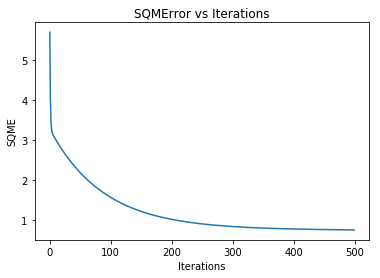

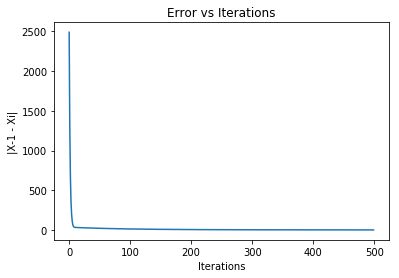

In [27]:
LearnLinearRegGD(500,1e-7)

Initial value of B is
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]]

Bellow are showed only the Squared error of the first 10 Iterations
The initial squared error is 5.69110502083
Squared error ot iteration# 1 is:  5.50726607845
Squared error ot iteration# 2 is:  5.335104072
Squared error ot iteration# 3 is:  5.17403822893
Squared error ot iteration# 4 is:  5.02350642531
Squared error ot iteration# 5 is:  4.88296433025
Squared error ot iteration# 6 is:  4.75188473037
Squared error ot iteration# 7 is:  4.62975702569
Squared error ot iteration# 8 is:  4.51608688424
Squared error ot iteration# 9 is:  4.41039603844
...
Final Squared error of iteration  500 is 2.19045441411
[[ 0.05513351]
 [ 0.03635856]
 [ 0.02192395]
 [ 0.08752513]
 [ 0.11060592]
 [ 0.01014416]]


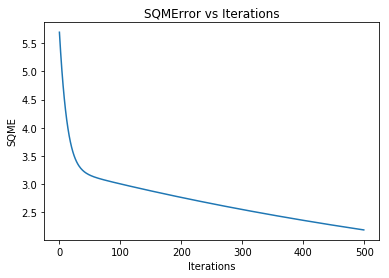

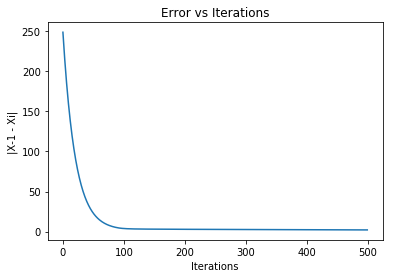

In [28]:
LearnLinearRegGD(500,1e-8)

Initial value of B is
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]]

Bellow are showed only the Squared error of the first 10 Iterations
The initial squared error is 5.69110502083
Squared error ot iteration# 1 is:  5.68184361248
Squared error ot iteration# 2 is:  5.67261141321
Squared error ot iteration# 3 is:  5.66340835204
Squared error ot iteration# 4 is:  5.65423435811
Squared error ot iteration# 5 is:  5.6450893607
Squared error ot iteration# 6 is:  5.63597328919
Squared error ot iteration# 7 is:  5.62688607307
Squared error ot iteration# 8 is:  5.61782764198
Squared error ot iteration# 9 is:  5.60879792563
...
Final Squared error of iteration  500 is 3.49415783677
[[ 0.01797287]
 [ 0.04813715]
 [ 0.00320877]
 [ 0.01092918]
 [ 0.01373224]
 [ 0.00129919]]


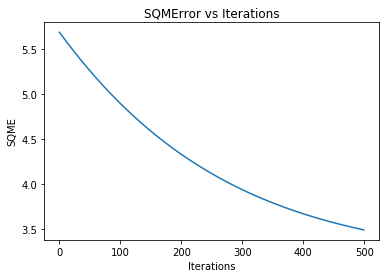

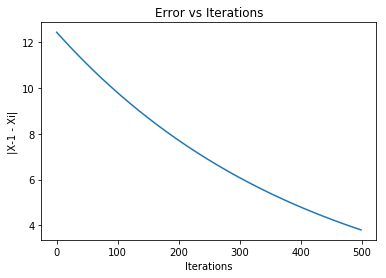

In [29]:
LearnLinearRegGD(500,5e-10)

### Part B: (7 Points): Step Length for Gradient Descent
This  task  is  based  on  Part  A.  

You  have  to implement two algorithms steplength-armijo and step-length bold driver given in the lecture slides. 

#### For each step length Algorithm:

1.  In each iteration of the minimize-GD algorithm calculate |f(xi−1) − f(xi)| and at the end of learning, plot it against iteration number i . Explain the graph. 

2.  In each iteration step also calculate RMSE on test and at the end of learning, plot it against iteration number i . Explain the graph. 

3. Compare the RMSE graphs of steplength-armijo and steplengthbolddriver and the three fixed step length. Explain your graph

<img src ="ARMJ.png"/>

In [30]:
def Armijo(Alpha,Delta): #Delta must be [0,1]!!!!
    A = np.vstack([Xtr.T, np.ones(len(Xtr))]).T 
    Ytr = np.array([tr.quality]).T
    B1 = np.array([[0,0,0,0,0,0]]) #x in the slide equation
    B = B1.T
    #Alpha= 1
    Err = Ytr - np.dot(A,B)
    Der = -2*Alpha*Delta*np.dot(A.T,Err)
    D1 = np.dot(Err.T,Err) - np.dot(Der.T,Der)
    Iz = np.dot((Ytr- np.dot(A,(B - Alpha*Der))).T,(Ytr- np.dot(A,(B - Alpha*Der))))
    ALV3 = []
    ALV4 = []
    print("Alpha values descent:")
    while Iz > D1:
        W1 = np.sum(Iz)
        Alpha = Alpha/2
        Der = -2*Alpha*Delta*np.dot(A.T,Err)
        D1 = np.dot(Err.T,Err) - np.dot(Der.T,Der)
        Iz = np.dot((Ytr- np.dot(A,(B - Alpha*Der))).T,(Ytr- np.dot(A,(B - Alpha*Der))))
        W2 = np.sum(Iz)
        ALV3.append(abs(W1-W2))
        ALV4.append(np.sum(Iz))
        print(Alpha)
    else:
        plt.plot(ALV3)
        plt.xlabel("Iterations")
        plt.ylabel("|Xi-1 - Xi|")
        plt.title("Error vs Iterations")
        plt.show()
        plt.plot(ALV4)
        plt.xlabel("Iterations")
        plt.ylabel("SQME")
        plt.title("SQMError vs Iterations")
        plt.show()
        print("Final value of Alpha is:")
        print(Alpha)

Alpha values descent:
50.0
25.0
12.5
6.25
3.125
1.5625
0.78125
0.390625
0.1953125
0.09765625
0.048828125
0.0244140625
0.01220703125
0.006103515625
0.0030517578125
0.00152587890625
0.000762939453125
0.0003814697265625
0.00019073486328125
9.5367431640625e-05
4.76837158203125e-05
2.384185791015625e-05
1.1920928955078125e-05
5.9604644775390625e-06
2.9802322387695312e-06
1.4901161193847656e-06
7.450580596923828e-07
3.725290298461914e-07
1.862645149230957e-07
9.313225746154785e-08
4.6566128730773926e-08
2.3283064365386963e-08
1.1641532182693481e-08


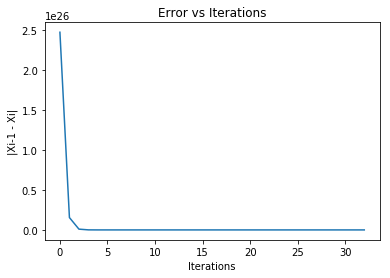

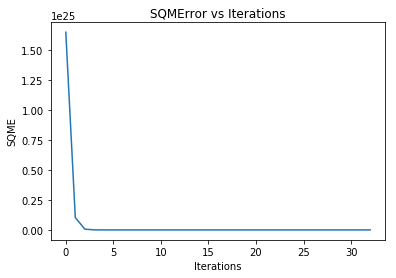

Final value of Alpha is:
1.1641532182693481e-08


In [31]:
    Armijo(100,1)

<img src ="BLD.png"/>


In [44]:
def BoldDriver(Alpha,AlphaP,AlphaM): #AlphaM must be [0,1]
    A = np.vstack([Xtr.T, np.ones(len(Xtr))]).T 
    Ytr = np.array([tr.quality]).T
    B1 = np.array([[0,0,0,0,0,0]]) #x in the slide equation
    B = B1.T
    ALP = Alpha*AlphaP
    Err = Ytr - np.dot(A,B)
    Der = -2*ALP*np.dot(A.T,Err)
    Iz = np.dot(Err.T,Err) - np.dot((Ytr- np.dot(A,(B - ALP*Der))).T,(Ytr- np.dot(A,(B - ALP*Der))))
    ALV3 = []
    ALV4 = []
    print("Alpha values descent:")
    while Iz<0:
        W1 = np.sum(Iz)
        ALP = ALP*AlphaM
        Der = -2*ALP*np.dot(A.T,Err)
        D1 = np.dot(Err.T,Err) - np.dot(Der.T,Der)
        Iz = np.dot((Ytr- np.dot(A,(B - Alpha*Der))).T,(Ytr- np.dot(A,(B - Alpha*Der))))
        W2 = np.sum(Iz)
        ALV3.append(abs(W1-W2))
        ALV4.append(np.sum(Iz))
        print(Iz)
    else:
        plt.plot(ALV3)
        plt.xlabel("Iterations")
        plt.ylabel("|Xi-1 - Xi|")
        plt.title("Error vs Iterations")
        plt.show()
        plt.plot(ALV4)
        plt.xlabel("Iterations")
        plt.ylabel("SQME")
        plt.title("SQMError vs Iterations")
        plt.show()
        print("Final value of Alpha is:")
        print(Alpha)